In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import sqlite3

In [4]:
target_csv = "./data/LosAngeles.csv"
csv_losAngeles = pd.read_csv(target_csv,low_memory=False)
target_csv = "./data/AirQualitySystem.csv"
csv_AirQuality = pd.read_csv(target_csv,low_memory=False)

In [102]:
data_url = "https://api.openaq.org/v1/measurements?city=Los Angeles"
data_content = requests.get(data_url)

In [104]:
data_results = data_content.json()
series = {}
series['Los Angeles'] = {}
for data in data_results['results']:
    if data['parameter'] in series['Los Angeles'].keys():
        if data['value'] > 0 :
            series['Los Angeles'][data['parameter']]['value'].append(data['value'])
            timepoint = time.strptime(data['date']['utc'],"%Y-%m-%dT%H:%M:%S.%fZ")
            series['Los Angeles'][data['parameter']]['time'].append(timepoint.tm_yday+timepoint.tm_hour/24)
        else :
            timepoint = time.strptime(data['date']['utc'],"%Y-%m-%dT%H:%M:%S.%fZ")
            timepoint = timepoint.tm_yday+timepoint.tm_hour/24
            if timepoint in series['Los Angeles'][data['parameter']]['error'].keys():
                series['Los Angeles'][data['parameter']]['error'][timepoint] += 1
            else :
                series['Los Angeles'][data['parameter']]['error'][timepoint] = 1
            
    else:
        series['Los Angeles'][data['parameter']] = {}
        series['Los Angeles'][data['parameter']]['value'] = []
        series['Los Angeles'][data['parameter']]['time'] = []
        series['Los Angeles'][data['parameter']]['error'] = {}
        if data['value'] > 0 :
            timepoint = time.strptime(data['date']['utc'],"%Y-%m-%dT%H:%M:%S.%fZ")
            series['Los Angeles'][data['parameter']]['value'].append(data['value'])
            series['Los Angeles'][data['parameter']]['time'].append(timepoint.tm_yday+timepoint.tm_hour/24)
        else :
            timepoint = time.strptime(data['date']['utc'],"%Y-%m-%dT%H:%M:%S.%fZ")
            timepoint = timepoint.tm_yday+timepoint.tm_hour/24
            if timepoint in series['Los Angeles'][data['parameter']]['error'].keys():
                series['Los Angeles'][data['parameter']]['error'][timepoint] += 1
            else :
                series['Los Angeles'][data['parameter']]['error'][timepoint] = 1
            

(array([290.4, 290.6, 290.8, 291. , 291.2, 291.4, 291.6, 291.8, 292. ,
        292.2]), <a list of 10 Text xticklabel objects>)

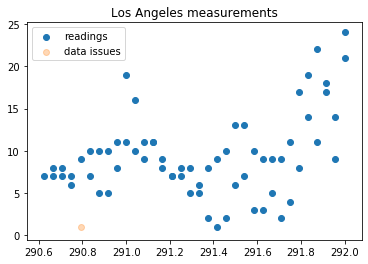

In [109]:
plt.scatter(series['Los Angeles']['pm25']['time'],series['Los Angeles']['pm25']['value'])
plt.scatter(series['Los Angeles']['pm25']['error'].keys(),series['Los Angeles']['pm25']['error'].values(),alpha=.3)
plt.title('Los Angeles measurements')
plt.legend(["readings","data issues"])
plt.xticks()

In [5]:
csv_losAngeles

date parameter  \
0       {utc=2017-08-11T00:00:00.000Z, local=2017-08-1...        co   
1       {utc=2017-08-11T00:00:00.000Z, local=2017-08-1...       no2   
2       {utc=2017-08-11T00:00:00.000Z, local=2017-08-1...        o3   
3       {utc=2017-08-11T00:00:00.000Z, local=2017-08-1...        co   
4       {utc=2017-08-11T00:00:00.000Z, local=2017-08-1...       no2   
...                                                   ...       ...   
986029  {utc=2019-04-03T20:00:00.000Z, local=2019-04-0...        co   
986030  {utc=2019-04-03T20:00:00.000Z, local=2019-04-0...        o3   
986031  {utc=2019-04-03T20:00:00.000Z, local=2019-04-0...        co   
986032  {utc=2019-04-03T20:00:00.000Z, local=2019-04-0...       no2   
986033  {utc=2019-04-03T20:00:00.000Z, local=2019-04-0...        o3   

                 location  value unit                              city  \
0                   Azusa  0.340  ppm  Los Angeles-Long Beach-Santa Ana   
1                   Azusa  0.015  ppm  Los Angeles-Long Beach-Santa Ana   
2                   Azusa  0.061  ppm  Los Angeles-Long Beach-Santa Ana   
3       Glendora - Laurel  0.240  ppm  Los Angeles-Long Beach-Santa Ana   
4       Glendora - Laurel  0.012  ppm  Los Angeles-Long Beach-Santa Ana   
...                   ...    ...  ...                               ...   
986029      Mission Viejo  0.110  ppm  Los Angeles-Long Beach-Santa Ana   
986030      Mission Viejo  0.042  ppm  Los Angeles-Long Beach-Santa Ana   
986031           La Habra  0.100  ppm  Los Angeles-Long Beach-Santa Ana   
986032           La Habra  0.003  ppm  Los Angeles-Long Beach-Santa Ana   
986033           La Habra  0.035  ppm  Los Angeles-Long Beach-Santa Ana   

                                              attribution  \
0       [{name=US EPA AirNow, url=http://www.airnow.go...   
1       [{name=US EPA AirNow, url=http://www.airnow.go...   
2       [{name=US EPA AirNow, url=http://www.airnow.go...   
3       [{name=US EPA AirNow, url=http://www.airnow.go...   
4       [{name=US EPA AirNow, url=http://www.airnow.go...   
...                                                   ...   
986029  [{name=US EPA AirNow, url=http://www.airnow.go...   
986030  [{name=US EPA AirNow, url=http://www.airnow.go...   
986031  [{name=US EPA AirNow, url=http://www.airnow.go...   
986032  [{name=US EPA AirNow, url=http://www.airnow.go...   
986033  [{name=US EPA AirNow, url=http://www.airnow.go...   

                averagingperiod                                  coordinates  \
0       {unit=hours, value=1.0}  {latitude=34.136475, longitude=-117.923965}   
1       {unit=hours, value=1.0}  {latitude=34.136475, longitude=-117.923965}   
2       {unit=hours, value=1.0}  {latitude=34.136475, longitude=-117.923965}   
3       {unit=hours, value=1.0}      {latitude=34.1439, longitude=-117.8508}   
4       {unit=hours, value=1.0}      {latitude=34.1439, longitude=-117.8508}   
...                         ...                                          ...   
986029  {unit=hours, value=1.0}    {latitude=33.62999, longitude=-117.67587}   
986030  {unit=hours, value=1.0}    {latitude=33.62999, longitude=-117.67587}   
986031  {unit=hours, value=1.0}    {latitude=33.92506, longitude=-117.95258}   
986032  {unit=hours, value=1.0}    {latitude=33.92506, longitude=-117.95258}   
986033  {unit=hours, value=1.0}    {latitude=33.92506, longitude=-117.95258}   

       country sourcename  sourcetype mobile  
0           US     AirNow  government  False  
1           US     AirNow  government  False  
2           US     AirNow  government  False  
3           US     AirNow  government  False  
4           US     AirNow  government  False  
...        ...        ...         ...    ...  
986029      US     AirNow  government  False  
986030      US     AirNow  government  False  
986031      US     AirNow  government  False  
986032      US     AirNow  government  False  
986033      US     AirNow  government  False  

[986034 rows x 13 columns]

In [6]:
connection = sqlite3.connect('weather-store.db')
cursor = connection.cursor()
#create table co table
creation_table = """CREATE TABLE co_parameter
                    (source text,reading real,unit text,latitude real,longitude real,confidence real,date text)"""
cursor.execute(creation_table)
connection.commit()
connection.close()

In [23]:
#setup database connection
connection = sqlite3.connect('weather-store.db')
cursor = connection.cursor()
#start writing to db
insert_statement = """INSERT INTO co_parameter Values(?,?,?,?,?,?,?)"""
#create value list
count = 0
inserts = []
for index,row in csv_losAngeles.iterrows():
    count += 1
    coords = row['coordinates'].replace("{","").replace("}","")
    coords = coords.split(",")
    location = {'latitude' : float(coords[0].split("=")[1]),'longitude' : float(coords[1].split("=")[1])}
    date = row['date'].replace("{","").replace("}","")
    date = date.split(",")[0].split("=")[1]
    inserts.append([row['sourcename'],row['value'],row['unit'],location['latitude'],location['longitude'],0,date])
    if count > 1000:
        cursor.executemany(insert_statement,inserts)
        count = 0
        inserts = []
        

In [24]:
connection.commit()
connection.close()